In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns 
import re
 
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, scale, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.inspection import permutation_importance

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern, RationalQuadratic
from sklearn.gaussian_process.kernels import Kernel, Hyperparameter, ConstantKernel
from sklearn.gaussian_process.kernels import GenericKernelMixin

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  

from sklearn.pipeline import make_pipeline

from sklearn.base import clone

In [3]:
def get_RF_feature_importance():
    features= X
    feature_list = list(features.columns)
    rf = RandomForestRegressor(n_estimators= 15, random_state=1)
    rf.fit(X , Y)

    # Get numerical feature importances
    importances = list(rf.feature_importances_)      
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, 
                           importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [4]:
data = pd.read_csv('Combined_all_3rd.csv', encoding='cp1252')  

In [5]:
data.columns.values

array(['Name', 'Coef_a', 'Coef_b', 'Coef_c', 'Coef_d', 'A_site', 'B_site',
       'X_site', 'Spacegroup', 'Ehull', 'BulkModulus', 'Energy', 'ZPE',
       's_A', 's_B', 's_X', 'density', 'mean_A2B', 'mean_A2X', 'mean_B2X',
       'mean_X2X', 'std_A2B', 'std_A2X', 'std_B2X', 'std_X2X', 'E_coh',
       'TF', 'OF', 'A_Z', 'B_Z', 'X_Z', 'A_M', 'B_M', 'X_M', 'A_G', 'B_G',
       'X_G', 'A_IEI', 'B_IEI', 'X_IEI', 'A_IEII', 'B_IEII', 'X_IEII',
       'A_EA', 'B_EA', 'X_EA', 'A_ChiP', 'B_ChiP', 'X_ChiP', 'A_ChiA',
       'X_ChiA', 'A_Rvdw', 'B_Rvdw', 'X_Rvdw', 'A_Rc', 'B_Rc', 'X_Rc',
       'A_Ra', 'B_Ra', 'X_Ra', 'A_MP', 'B_MP', 'X_MP', 'A_BP', 'B_BP',
       'X_BP', 'A_Rho', 'B_Rho', 'A_MV', 'B_MV', 'X_MV', 'A_Hf', 'B_Hf',
       'X_Hf', 'A_Hv', 'B_Hv', 'X_Hv', 'A_Kappa', 'B_Kappa', 'X_Kappa',
       'A_CvM', 'B_CvM', 'X_CvM', 'A_B', 'B_B', 'X_B', 'A_MendeleevNo',
       'B_MendeleevNo', 'X_MendeleevNo'], dtype=object)

In [6]:
data.drop(['Name', 'A_site', 'B_site', 'X_site', 'Spacegroup', 'Ehull','BulkModulus', 'Energy','s_A','s_B','s_X','Coef_a','Coef_b', 'Coef_c', 'Coef_d'], axis=1, inplace = True)

In [7]:
data.fillna(0, inplace= True)

In [8]:
d=data.copy()
d.columns.values

array(['ZPE', 'density', 'mean_A2B', 'mean_A2X', 'mean_B2X', 'mean_X2X',
       'std_A2B', 'std_A2X', 'std_B2X', 'std_X2X', 'E_coh', 'TF', 'OF',
       'A_Z', 'B_Z', 'X_Z', 'A_M', 'B_M', 'X_M', 'A_G', 'B_G', 'X_G',
       'A_IEI', 'B_IEI', 'X_IEI', 'A_IEII', 'B_IEII', 'X_IEII', 'A_EA',
       'B_EA', 'X_EA', 'A_ChiP', 'B_ChiP', 'X_ChiP', 'A_ChiA', 'X_ChiA',
       'A_Rvdw', 'B_Rvdw', 'X_Rvdw', 'A_Rc', 'B_Rc', 'X_Rc', 'A_Ra',
       'B_Ra', 'X_Ra', 'A_MP', 'B_MP', 'X_MP', 'A_BP', 'B_BP', 'X_BP',
       'A_Rho', 'B_Rho', 'A_MV', 'B_MV', 'X_MV', 'A_Hf', 'B_Hf', 'X_Hf',
       'A_Hv', 'B_Hv', 'X_Hv', 'A_Kappa', 'B_Kappa', 'X_Kappa', 'A_CvM',
       'B_CvM', 'X_CvM', 'A_B', 'B_B', 'X_B', 'A_MendeleevNo',
       'B_MendeleevNo', 'X_MendeleevNo'], dtype=object)

In [9]:
columns = list(d.columns.values)

In [10]:
data_std=d.copy()
scaler=MinMaxScaler()
scaler.fit(np.array(data['ZPE']).reshape(-1, 1))
data_zpe_std= scaler.transform(np.array(data['ZPE']).reshape(-1, 1))
data_std[columns]= MinMaxScaler().fit_transform(d[columns])
Y = data_std['ZPE'] 
X = data_std.drop(['ZPE'], axis=1)

In [11]:
corrmat = X.corr()
top_corr_features = corrmat.index
correlated_features = set()

In [12]:
for i in range(len(X.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.9:
            colname = corrmat.columns[i]
            correlated_features.add(colname)
len(correlated_features)
print(correlated_features)

{'A_MV', 'X_Hf', 'X_BP', 'X_CvM', 'B_BP', 'X_Hv', 'X_Rc', 'X_ChiA', 'A_Ra', 'A_Hv', 'A_M', 'X_M', 'A_Hf', 'X_B', 'X_MP', 'A_BP', 'A_Rc', 'X_IEII', 'A_MendeleevNo', 'B_Hv', 'B_M', 'X_MendeleevNo', 'X_Ra'}


In [13]:
data_std.drop(labels=correlated_features, axis=1, inplace=True)
data_std.shape

(80, 51)

In [14]:
# split into train and test
df_train, df_test = train_test_split(data_std, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 50)
df_train.reset_index(inplace = True)
df_test.reset_index(inplace = True)
df_train=df_train.drop('index',axis=1)
df_test=df_test.drop('index',axis=1)
# divide into X_train, y_train, X_test, y_test
Y = df_train.pop('ZPE')
X = df_train

Y_test = df_test.pop('ZPE')
X_test = df_test

In [15]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

     Feature      Score
25      X_EA  92.731602
32    X_Rvdw  78.252722
14       X_Z  56.410866
1   mean_A2B  50.922633
4   mean_X2X  30.227587
17       X_G  27.028217
30    A_Rvdw  25.470189
18     A_IEI  20.253029
2   mean_A2X  20.187025
41      B_Hf  16.502777
13       B_Z  15.285802
7    std_B2X  13.488784
34      B_Ra  13.013335
29    A_ChiA  12.911391
9      E_coh  12.906501
11        OF  12.359339
23      A_EA  12.040753
6    std_A2X  11.184092
26    A_ChiP   9.894678
36      B_MP   9.555513
38     B_Rho   8.828042
46     B_CvM   7.511897
10        TF   6.732381
42   A_Kappa   6.485563
35      A_MP   6.292825
40      X_MV   5.978844
33      B_Rc   5.532563
31    B_Rvdw   5.346255
8    std_X2X   4.906579
5    std_A2B   4.709590


In [16]:
get_RF_feature_importance()

Variable: X_Z                  Importance: 0.3
Variable: X_EA                 Importance: 0.24
Variable: B_Rho                Importance: 0.11
Variable: mean_A2B             Importance: 0.06
Variable: mean_X2X             Importance: 0.05
Variable: B_Z                  Importance: 0.05
Variable: density              Importance: 0.04
Variable: E_coh                Importance: 0.04
Variable: B_CvM                Importance: 0.03
Variable: A_ChiA               Importance: 0.02
Variable: mean_A2X             Importance: 0.01
Variable: std_X2X              Importance: 0.01
Variable: B_Kappa              Importance: 0.01
Variable: mean_B2X             Importance: 0.0
Variable: std_A2B              Importance: 0.0
Variable: std_A2X              Importance: 0.0
Variable: std_B2X              Importance: 0.0
Variable: TF                   Importance: 0.0
Variable: OF                   Importance: 0.0
Variable: A_Z                  Importance: 0.0
Variable: A_G                  Importance: 0.0
V

In [17]:
featureScores.nlargest(30,'Score')['Feature'].values

array(['X_EA', 'X_Rvdw', 'X_Z', 'mean_A2B', 'mean_X2X', 'X_G', 'A_Rvdw',
       'A_IEI', 'mean_A2X', 'B_Hf', 'B_Z', 'std_B2X', 'B_Ra', 'A_ChiA',
       'E_coh', 'OF', 'A_EA', 'std_A2X', 'A_ChiP', 'B_MP', 'B_Rho',
       'B_CvM', 'TF', 'A_Kappa', 'A_MP', 'X_MV', 'B_Rc', 'B_Rvdw',
       'std_X2X', 'std_A2B'], dtype=object)

In [18]:
X=X[featureScores.nlargest(30,'Score')['Feature'].values]
X_test=X_test[featureScores.nlargest(30,'Score')['Feature'].values]

GPR-5:  0.9704767060670169
RMSE:  0.04183560136992241
RMSE unscaled:  2.0471089724344784
----------------------------------------
[[33.42      ]
 [23.87      ]
 [ 5.8380683 ]
 [36.9297267 ]
 [15.7748079 ]
 [26.87242305]
 [22.6       ]
 [35.32471825]
 [50.8166236 ]
 [15.6856663 ]
 [30.8809408 ]
 [23.93696502]
 [31.41689598]
 [22.5       ]
 [ 8.68189005]
 [46.0813441 ]]
[[33.94178916]
 [21.4748607 ]
 [ 5.61118963]
 [40.15544861]
 [14.52252499]
 [26.14000522]
 [21.68154639]
 [38.24063492]
 [48.87343863]
 [17.86249073]
 [30.39186499]
 [23.43075237]
 [33.38406166]
 [20.72842383]
 [10.98757099]
 [41.86238349]]


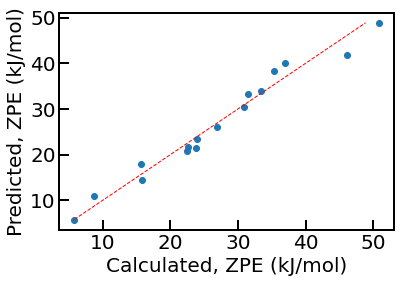

In [19]:
#model = GaussianProcessRegressor(kernel=1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3))+ 
#                                WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)),alpha=0.0)
model = GaussianProcessRegressor(kernel=1.0 * RationalQuadratic(length_scale=1.0, alpha=0.01))
model.fit(X,Y)
predicted = model.predict(X_test)
r2=sklearn.metrics.r2_score(Y_test, predicted)
Y_unscaled = scaler.inverse_transform(np.array(Y_test).reshape(-1,1))
predicted_unscaled = scaler.inverse_transform(np.array(predicted).reshape(-1,1))
err=np.sqrt(mean_squared_error(Y_test,predicted))
err_unscaled=np.sqrt(mean_squared_error(Y_unscaled,predicted_unscaled))
print("GPR-5: ",r2)
print("RMSE: ",err)
print("RMSE unscaled: ",err_unscaled)
print("----------------------------------------")
fig, ax = plt.subplots()
ax.scatter(Y_unscaled, predicted_unscaled)
print(Y_unscaled)
print(predicted_unscaled)
ax.plot([Y_unscaled.min(), predicted_unscaled.max()], [Y_unscaled.min(), predicted_unscaled.max()], 'r--', lw=1)
#for i in range(len(Y_test)):
#    plt.annotate(text[i], (Y_test[i], predicted[i]))
ax.set_xlabel("Calculated, ZPE (kJ/mol)",fontsize= 20)
ax.set_ylabel("Predicted, ZPE (kJ/mol)",fontsize= 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.tick_params(direction='in', length=10, width=2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
#plt.savefig('kl_train.eps', format='eps', bbox_inches='tight',pad_inches = 0)
plt.show()

GPR-2:  0.9999999999999997
RMSE:  4.413649899931643e-09
RMSE unscaled:  2.1596970072460753e-07
----------------------------------------
[[22.06      ]
 [34.99597655]
 [19.3823906 ]
 [24.44      ]
 [32.68424487]
 [28.54429217]
 [18.49596025]
 [12.58451505]
 [29.14399078]
 [27.07      ]
 [34.39904833]
 [26.39191275]
 [25.95160828]
 [ 5.24777708]
 [28.3858273 ]
 [ 8.8       ]
 [26.5228052 ]
 [ 9.0333859 ]
 [20.1085789 ]
 [29.29279902]
 [41.2670353 ]
 [17.4065927 ]
 [28.61822302]
 [20.6696547 ]
 [19.73080107]
 [17.3132009 ]
 [13.97      ]
 [ 7.1844583 ]
 [27.56722682]
 [40.5487446 ]
 [47.721477  ]
 [45.37909632]
 [ 9.97486128]
 [18.60086272]
 [28.92860965]
 [34.6857921 ]
 [23.5574754 ]
 [ 5.62231637]
 [ 6.63804332]
 [54.18      ]
 [25.9260651 ]
 [40.7533565 ]
 [ 8.17305587]
 [30.4940185 ]
 [31.79467752]
 [36.18213492]
 [14.0750994 ]
 [50.56      ]
 [26.5950365 ]
 [28.0701563 ]
 [ 8.5345507 ]
 [45.79      ]
 [10.37263913]
 [21.9558147 ]
 [29.0647247 ]
 [20.3287001 ]
 [27.56391397]
 [ 8.9319

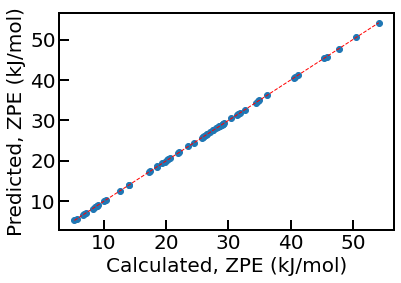

In [20]:
predicted = model.predict(X)
r2=sklearn.metrics.r2_score(Y, predicted)
Y_unscaled = scaler.inverse_transform(np.array(Y).reshape(-1,1))
predicted_unscaled = scaler.inverse_transform(np.array(predicted).reshape(-1,1))
err=np.sqrt(mean_squared_error(Y,predicted))
err_unscaled=np.sqrt(mean_squared_error(Y_unscaled,predicted_unscaled))
print("GPR-2: ",r2)
print("RMSE: ",err)
print("RMSE unscaled: ",err_unscaled)
print("----------------------------------------")
fig, ax = plt.subplots()
ax.scatter(Y_unscaled, predicted_unscaled)
print(Y_unscaled)
print(predicted_unscaled)
ax.plot([Y_unscaled.min(), predicted_unscaled.max()], [Y_unscaled.min(), predicted_unscaled.max()], 'r--', lw=1)
#for i in range(len(Y_test)):
#    plt.annotate(text[i], (Y_test[i], predicted[i]))
ax.set_xlabel("Calculated, ZPE (kJ/mol)",fontsize= 20)
ax.set_ylabel("Predicted, ZPE (kJ/mol)",fontsize= 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.tick_params(direction='in', length=10, width=2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
#plt.savefig('kl_train.eps', format='eps', bbox_inches='tight',pad_inches = 0)
plt.show()

Feature: 0, Score: 0.01204
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.00347
Feature: 3, Score: 0.00037
Feature: 4, Score: 0.00272
Feature: 5, Score: 0.00585
Feature: 6, Score: 0.00722
Feature: 7, Score: 0.00020
Feature: 8, Score: 0.00067
Feature: 9, Score: 0.00126
Feature: 10, Score: 0.00415
Feature: 11, Score: 0.00031
Feature: 12, Score: 0.00012
Feature: 13, Score: 0.00044
Feature: 14, Score: 0.00011
Feature: 15, Score: 0.00070
Feature: 16, Score: 0.00053
Feature: 17, Score: 0.00037
Feature: 18, Score: 0.00066
Feature: 19, Score: 0.00102
Feature: 20, Score: 0.00072
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00074
Feature: 23, Score: 0.00028
Feature: 24, Score: 0.00019
Feature: 25, Score: 0.00021
Feature: 26, Score: 0.00054
Feature: 27, Score: 0.00031
Feature: 28, Score: 0.00180
Feature: 29, Score: 0.00019


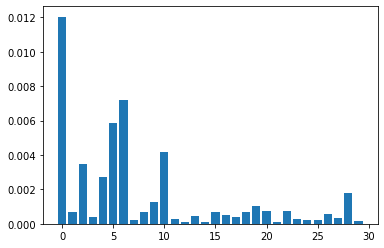

In [21]:
# fit the model
feature_scores=[]
model.fit(X, Y)
# perform permutation importance
results = permutation_importance(model, X, Y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    feature_scores.append(v)
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [22]:
featureNames = X.columns
dfscores = pd.DataFrame(feature_scores)
dfcolumns = pd.DataFrame(featureNames)
#concat two dataframes for better visualization 
featureImportance = pd.concat([dfcolumns,dfscores],axis=1)
featureImportance.columns = ['Feature','Score']  #naming the dataframe columns
print(featureImportance.nlargest(10,'Score'))  #print 10 best features

     Feature     Score
0       X_EA  0.012042
6     A_Rvdw  0.007217
5        X_G  0.005846
10       B_Z  0.004151
2        X_Z  0.003473
4   mean_X2X  0.002720
28   std_X2X  0.001796
9       B_Hf  0.001255
19      B_MP  0.001015
22        TF  0.000736


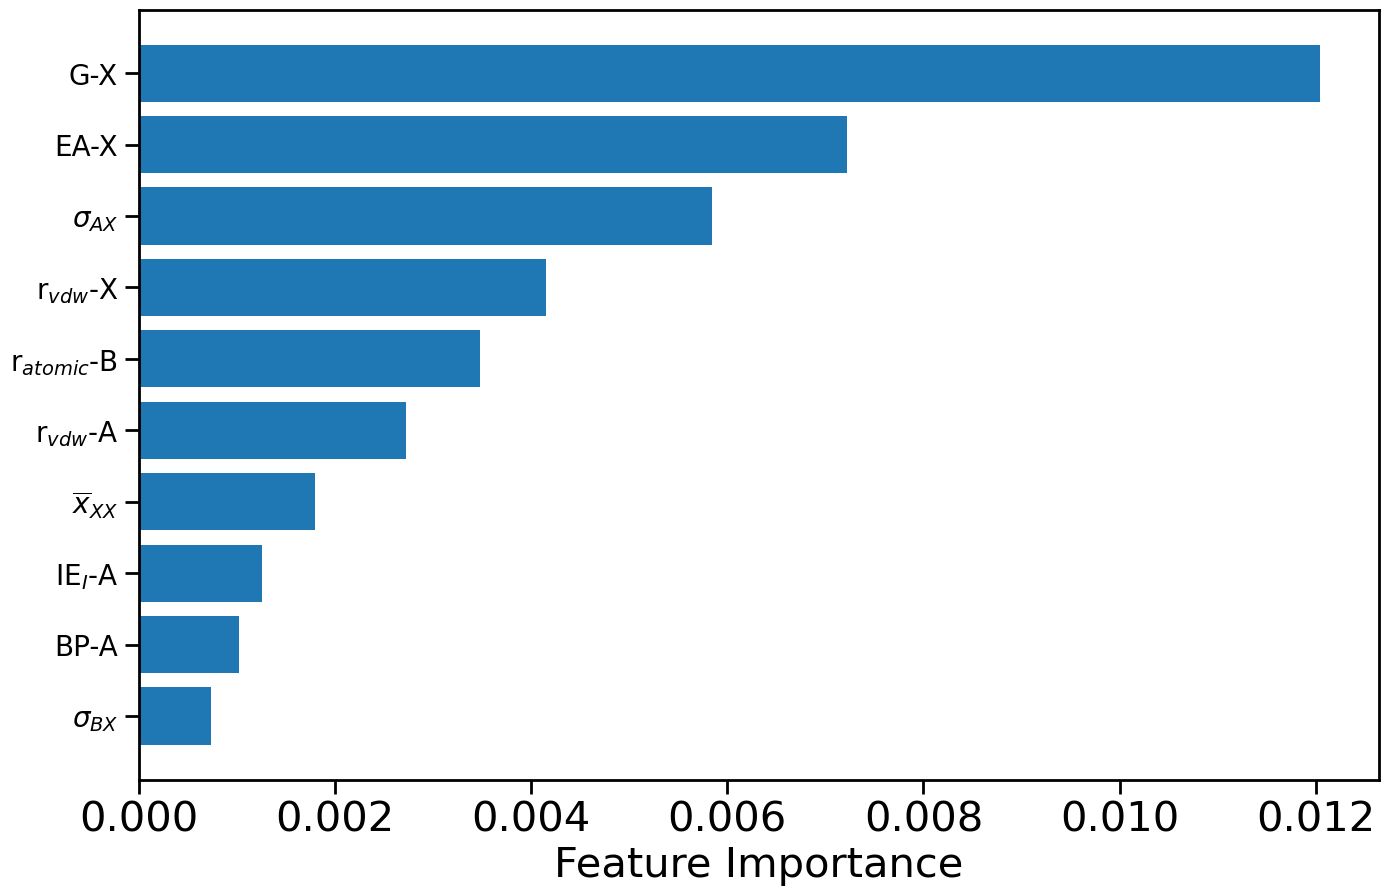

In [23]:
features = featureImportance.nlargest(10,'Score')['Feature']
features_formatted = ["G-X","EA-X","$\sigma_{AX}$","r$_{vdw}$-X","r$_{atomic}$-B",
                      "r$_{vdw}$-A","$\overline{x}_{XX}$","IE$_{I}$-A","BP-A","$\sigma_{BX}$"]
Score = featureImportance.nlargest(10,'Score')['Score']
# Figure Size
plt.rcdefaults()
fig, ax = plt.subplots(figsize =(16, 10))

#y_pos = np.arange(len(features))
importance = Score
ax.barh(features, importance, align='center')

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

# Remove x, y Ticks
#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')

ax.tick_params(direction='out', length=10, width=2)


# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
ax.set_yticklabels(features_formatted, fontsize= 20)
plt.xticks(fontsize=30)
#ax.set_xticklabels(Score, fontsize= 20)
# Add x, y gridlines
#ax.grid(b = True, color ='grey',
#        linestyle ='-.', linewidth = 0.5,
 #       alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
#for i in ax.patches:
 #   plt.text(i.get_width()+0.2, i.get_y()+0.5,
 #            str(round((i.get_width()), 2)),
#             fontsize = 15, fontweight ='bold',
#             color ='black') 
 
# Add Plot Title
#ax.set_title('Top 10 features',loc ='center', fontsize = 30)
#plot save
ax.set_xlabel('Feature Importance', fontsize = 30)
plt.savefig('imp.png', format='png',dpi=350)
# Show Plot
plt.show()